<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/IClasswork/Ite'sInClassLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2020_FBianco/master/data/walkingsped_Bettencourt07.csv", 
                   header=None, names=["population", "wspeed"])


In [ ]:
df

In [ ]:
df.plot("population","wspeed",kind="scatter");

In [6]:
import numpy as np

In [7]:
df["log_population"]=np.log10(df["population"])

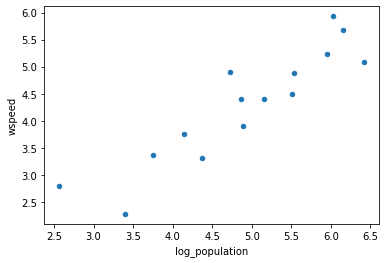

In [8]:
df.plot("log_population","wspeed",kind="scatter");

scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

In [ ]:
#initiate the model

In [10]:
slr=LinearRegression()

In [ ]:
#fit the model

In [22]:
df["log_population"]

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: log_population, dtype: float64

In [23]:
df["log_population"].shape

(15,)

In [ ]:
df["log_population"].values.reshape(-1,1)

In [ ]:
logpop=df["log_population"].values.reshape(-1,1)
logpop

In [ ]:
logpop.shape

In [ ]:
slr.fit(logpop, df["wspeed"])

In [ ]:
slr.intercept_

In [ ]:
slr.coef_

In [ ]:
slr.coef_[0]

In [ ]:
ax=df.plot("log_population","wspeed",kind="scatter");

x=np.arange(2.5,6.5,0.1)
y=slr.coef_*x + slr.intercept_
ax.plot(x,y,label="model");

In [32]:
slr.predict(logpop)

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

In [33]:
df["prediction"]=slr.predict(logpop)

In [ ]:
df

In [55]:
def r2(yo, yp):
 return 1- ((yo-yp)**2).sum() / ((yo - yo.mean())**2).sum()

In [56]:
r2(df["wspeed"],df["prediction"])

0.8216814457855732

statsmodel

In [47]:
import statsmodels.formula.api as smf

In [50]:
model=smf.ols(formula='wspeed~log_population', data=df)

In [51]:
results=model.fit()

In [52]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           3.21e-06
Time:                        20:33:19   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0566      0.560      0.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [57]:
model=smf.ols(formula='wspeed~ I(log_population**2) +log_population', data=df)

In [58]:
results=model.fit()

In [ ]:
print(results.summary())